In [57]:
import os.path as op
import glob
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [99]:
data_folder = "/scratch/hyruuk/neuromod/shinobi2023"
data_pattern = op.join(data_folder, 'shinobi_training/*/*/*/*.json')

files_list = glob.glob(data_pattern)


data_dict = {"Subject":[],
             "Level":[],
             "Timestamp":[],
             "Value":[]}
for file in files_list:
    with open(file, "r") as rf:
        data = json.load(rf)
    data_dict["Subject"].append(file.split('/')[6])
    data_dict["Level"].append(data["Level"][-3:])
    data_dict["Timestamp"].append(data["LevelStartTimestamp"])
    if int(data["Level"][-3]) == 1:
        value = 0
    elif int(data["Level"][-3]) == 4:
        value = 1
    elif int(data["Level"][-3]) == 5:
        value = 2
    data_dict["Value"].append(value)
    
    
data_df = pd.DataFrame(data_dict)
# trim data dict from sub-03 data
data_df = data_df[data_df["Subject"]!="sub-03"]
data_df = data_df.set_index("Timestamp")

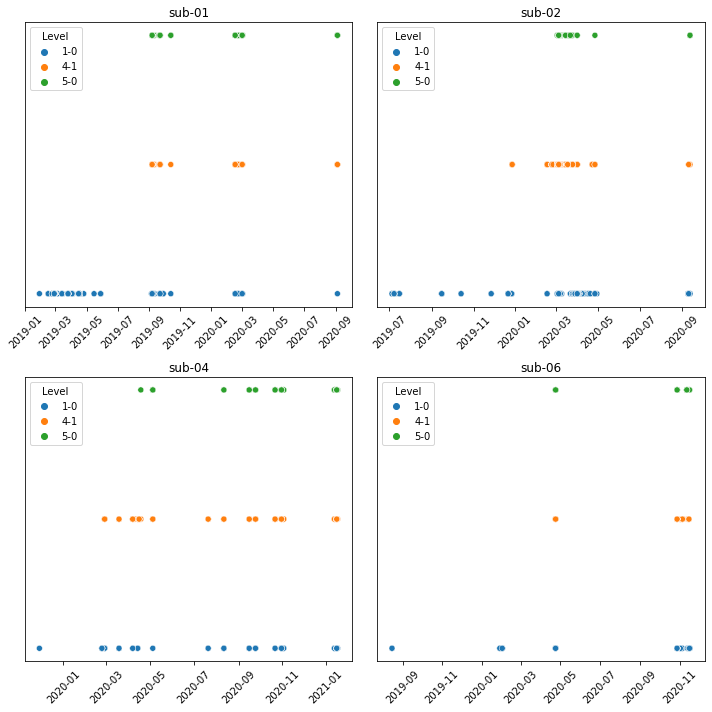

In [133]:
import seaborn as sns

figure, axis = plt.subplots(2, 2, figsize=(10,10))
ax_flat = axis.flatten()
plt.xticks(rotation=60)
for idx, subj in enumerate(np.unique(data_df["Subject"])):
    sub_df = data_df[data_df["Subject"]==subj]
    sns.scatterplot(data=sub_df, x=[datetime.fromtimestamp(x) for x in sub_df.index], 
                    y="Value", hue="Level", hue_order=["1-0", "4-1", "5-0"],
                    ax=ax_flat[idx])
    ax_flat[idx].set_title(subj)
    ax_flat[idx].tick_params(axis='x', labelrotation=45)
    ax_flat[idx].set_yticks([])
    ax_flat[idx].set_ylabel("")
plt.tight_layout()

In [123]:
!pip show matplotlib

Name: matplotlib
Version: 3.4.2+computecanada
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/hyruuk/python_envs/shinobi_env/lib/python3.7/site-packages
Requires: kiwisolver, pillow, numpy, python-dateutil, cycler, pyparsing
Required-by: seaborn, ptitprince


In [107]:
from datetime import datetime

[datetime.fromtimestamp(x) for x in sub_df.index]

[datetime.datetime(2020, 11, 4, 17, 19, 23),
 datetime.datetime(2020, 11, 4, 16, 37, 7),
 datetime.datetime(2020, 11, 4, 17, 0, 24),
 datetime.datetime(2020, 11, 4, 17, 10, 52),
 datetime.datetime(2020, 11, 4, 17, 24, 56),
 datetime.datetime(2020, 11, 4, 17, 3, 56),
 datetime.datetime(2020, 11, 4, 16, 37, 12),
 datetime.datetime(2020, 11, 4, 16, 31, 25),
 datetime.datetime(2020, 11, 4, 17, 5, 22),
 datetime.datetime(2020, 11, 4, 17, 12, 5),
 datetime.datetime(2020, 11, 4, 16, 42, 22),
 datetime.datetime(2020, 11, 4, 17, 17, 48),
 datetime.datetime(2020, 2, 1, 10, 29, 20),
 datetime.datetime(2020, 2, 1, 12, 33, 12),
 datetime.datetime(2020, 2, 1, 10, 47, 8),
 datetime.datetime(2020, 2, 1, 10, 41, 1),
 datetime.datetime(2020, 2, 1, 12, 38, 43),
 datetime.datetime(2020, 2, 1, 12, 21, 26),
 datetime.datetime(2020, 2, 1, 12, 48, 35),
 datetime.datetime(2020, 11, 1, 17, 5, 16),
 datetime.datetime(2020, 11, 1, 17, 32, 11),
 datetime.datetime(2020, 11, 1, 17, 23, 28),
 datetime.datetime(2020, 

In [102]:
filtered_df = data_df[data_df["Subject"] == "sub-01"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

KeyError: 'Timestamp'

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-02"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-03"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-04"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-05"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))

In [ ]:
filtered_df = data_df[data_df["Subject"] == "sub-06"]
plt.scatter(filtered_df[filtered_df["Level"]=="1-0"]["Timestamp"], [0]*len(filtered_df[filtered_df["Level"]=="1-0"]))
plt.scatter(filtered_df[filtered_df["Level"]=="4-1"]["Timestamp"], [1]*len(filtered_df[filtered_df["Level"]=="4-1"]))
plt.scatter(filtered_df[filtered_df["Level"]=="5-0"]["Timestamp"], [2]*len(filtered_df[filtered_df["Level"]=="5-0"]))